In [10]:
import numpy as np
# Erzeuge einen Superpositionszustand (α|0⟩ + β|1⟩)
alpha, beta = 1/np.sqrt(2), 1/np.sqrt(2)  # Gleichverteilung
qubit = np.array([alpha, beta])
print("Qubit-Vektor:", qubit)

Qubit-Vektor: [0.70710678 0.70710678]


In [11]:
import pandas as pd
# Beispiel-Lieferroute (Städte, Distanzen)
df = pd.DataFrame({"Stadt": ["Berlin", "München"], "Distanz_km": [300, 600]})
print(df)

     Stadt  Distanz_km
0   Berlin         300
1  München         600


In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

# Quantenschaltkreis erstellen
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])  # Explizite Messung

# Simulation mit der modernen Aer-API
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1024)  # Direkte Verwendung des Backends
result = job.result()
counts = result.get_counts()

print("Schaltkreis:")
print(qc.draw())
print("\nMessergebnisse:", counts)

Schaltkreis:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Messergebnisse: {'11': 527, '00': 497}


In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer  # Sollte jetzt funktionieren

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
print(qc.draw())

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


Ergebnis: {'11': 1493, '00': 1507}


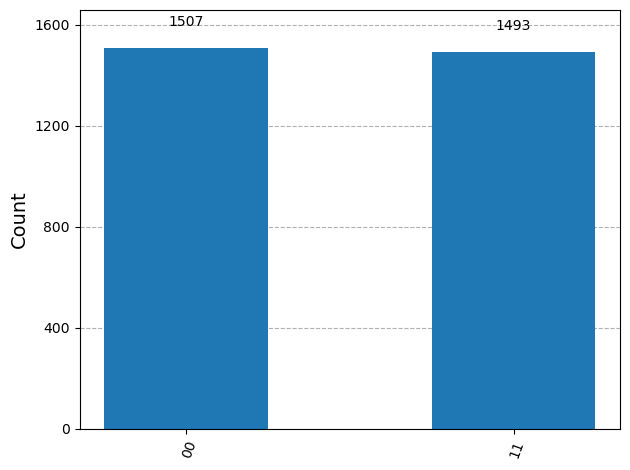

In [83]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Achtung: "aer" statt "Aer"!

# 1. Quantenschaltkreis erstellen
qc = QuantumCircuit(2)
qc.h(0)          # Hadamard-Gatter (Superposition)
qc.cx(0, 1)      # CNOT (Verschränkung)
qc.measure_all() # Messung

# 2. Simulation mit AerSimulator
simulator = AerSimulator()  # Neu: Direkte Instanzierung
job = simulator.run(qc, shots=3000)  # Modernes Interface
result = job.result()
counts = result.get_counts()

# 3. Ergebnis plotten
print("Ergebnis:", counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [85]:
import qiskit
print(qiskit.__version__)  # Sollte >= 0.39.0 sein

2.0.2


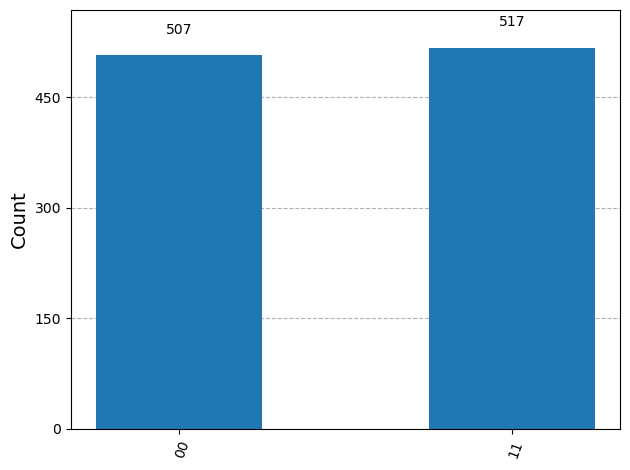

{'11': 517, '00': 507}


In [96]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.show()

print(counts)


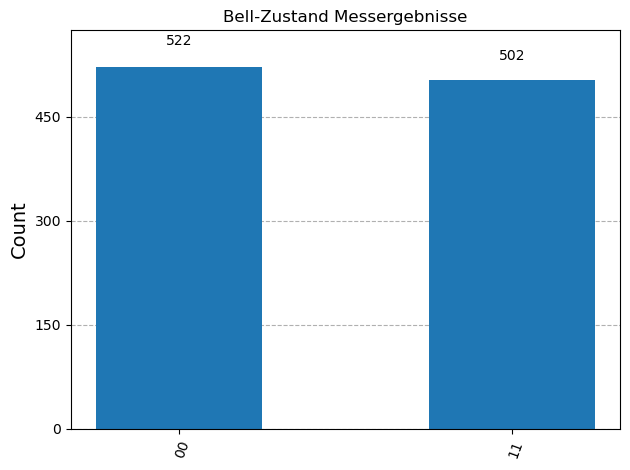

In [4]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Schaltkreis erstellen
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Simulator definieren und ausführen
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Visualisierung
plot_histogram(counts, title="Bell-Zustand Messergebnisse")
plt.show()


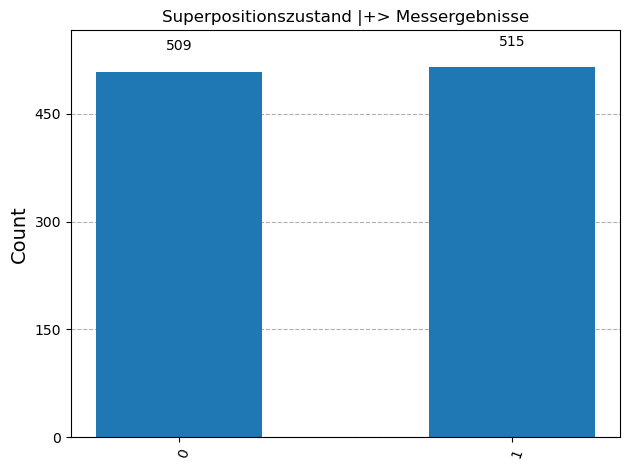

In [34]:
# Erzeuge und untersuche einen Superpositionszustand
#Aufgabenstellung:
#Erstelle einen Quanten-Schaltkreis mit einem Qubit, bringe es in eine Superposition, führe eine Messung durch und visualisiere die Messergebnisse. Analysiere anschließend das Ergebnis.

#Schritt-für-Schritt-Anleitung:

#Schaltkreis erstellen:

#Ein Qubit, ein klassisches Bit.

#Hadamard-Gatter auf das Qubit anwenden.

#Messung hinzufügen:

#Das Qubit messen und das Ergebnis im klassischen Bit speichern.

#Simulation und Visualisierung:

#Mit dem AerSimulator ausführen.

#Die Messergebnisse als Histogramm darstellen.

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. Schaltkreis mit 1 Qubit und 1 klassischem Bit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Hadamard-Gatter erzeugt Superposition
qc.measure(0, 0)  # Messung

# 2. Simulation
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)  # 1024 Schüsse für statistische Verteilung
result = job.result()
counts = result.get_counts()

# 3. Visualisierung
plot_histogram(counts, title="Superpositionszustand |+> Messergebnisse")
plt.show()


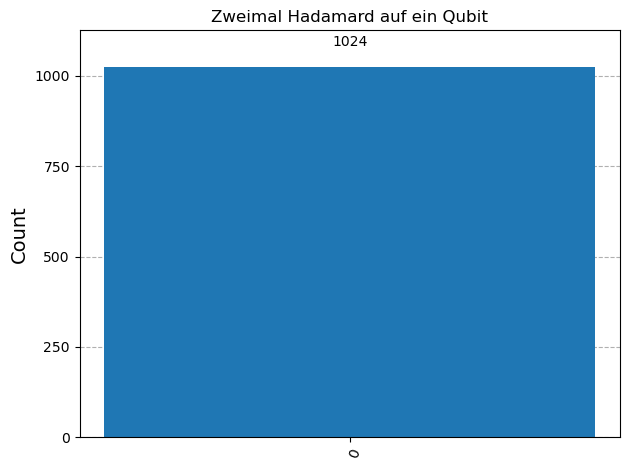

In [40]:
# Messung mit zweitem Hadamard-Gatter
# Aufgabenerweiterung:

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(1, 1)
qc.h(0)       # Erstes Hadamard: Superposition
qc.h(0)       # Zweites Hadamard: Rückkehr zum Anfangszustand
qc.measure(0, 0)

simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts, title="Zweimal Hadamard auf ein Qubit")
plt.show()


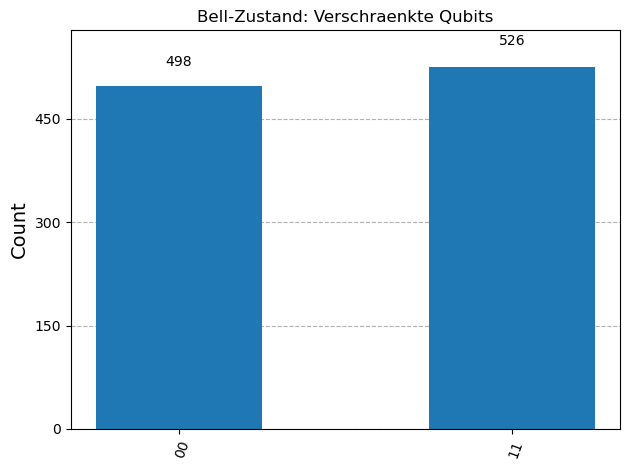

In [42]:
"""Neue Qiskit-Aufgabe: Erzeuge einen verschränkten Zustand und überprüfe die Korrelation
Aufgabenstellung:
Erstelle einen Quanten-Schaltkreis mit zwei Qubits, bringe sie in einen verschränkten Zustand (Bell-Zustand), führe Messungen durch und analysiere die Korrelation der Messergebnisse.

Schritt-für-Schritt-Anleitung:

Schaltkreis erstellen:

Zwei Qubits, zwei klassische Bits.

Hadamard-Gatter auf Qubit 0.

CNOT-Gatter (Qubit 0 steuert Qubit 1).

Messung:

Beide Qubits messen und die Ergebnisse in die klassischen Bits schreiben.

Simulation und Visualisierung:

Mit AerSimulator ausführen.

Messergebnisse als Histogramm darstellen. """

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. Schaltkreis mit 2 Qubits und 2 klassischen Bits
qc = QuantumCircuit(2, 2)
qc.h(0)        # Hadamard-Gatter auf Qubit 0
qc.cx(0, 1)    # CNOT-Gatter (Qubit 0 steuert Qubit 1)
qc.measure([0, 1], [0, 1])  # Beide Qubits messen

# 2. Simulation
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# 3. Visualisierung
plot_histogram(counts, title="Bell-Zustand: Verschraenkte Qubits")
plt.show()


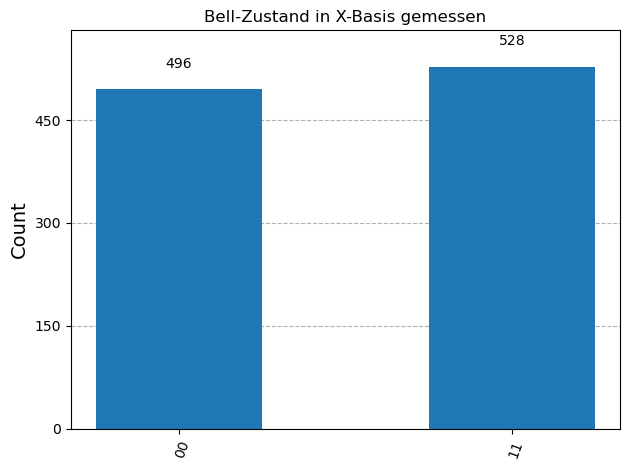

In [45]:
"""Erweitere den Bell-Zustand-Schaltkreis, um die Qubits in der X-Basis (Superpositionsbasis) statt der Standard-Z-Basis zu messen. Analysiere, wie sich die Korrelation der Ergebnisse ändert.

1. Theoretischer Hintergrund
X-Basis-Messung:
Um in der X-Basis zu messen, wird vor der Messung ein Hadamard-Gatter auf das jeweilige Qubit angewendet. """
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Hadamard-Gatter vor der Messung für X-Basis-Messung
qc.h([0, 1])  # Wichtig: Nur für X-Basis-Messung!
qc.measure([0, 1], [0, 1])

simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts, title="Bell-Zustand in X-Basis gemessen")
plt.show()


In [50]:
"""Deutsch-Jozsa-Algorithmus"""

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

# ... [Ihr bestehender Code für Oracle und Algorithmus] ...

# Simulation mit Qiskit 2.0+
n = 3
oracle = deutsch_jozsa_oracle(n, balanced=True)
dj_circuit = deutsch_jozsa_algorithm(n, oracle)

# 1. Simulator erstellen
simulator = AerSimulator()

# 2. Schaltkreis transpilieren (notwendig für neues Backend)
transpiled_circuit = transpile(dj_circuit, simulator)

# 3. Simulation durchführen
result = simulator.run(transpiled_circuit, shots=1).result()

# 4. Ergebnisse auslesen
counts = result.get_counts()
print(counts)


{'111': 1}


{'11': 1000}


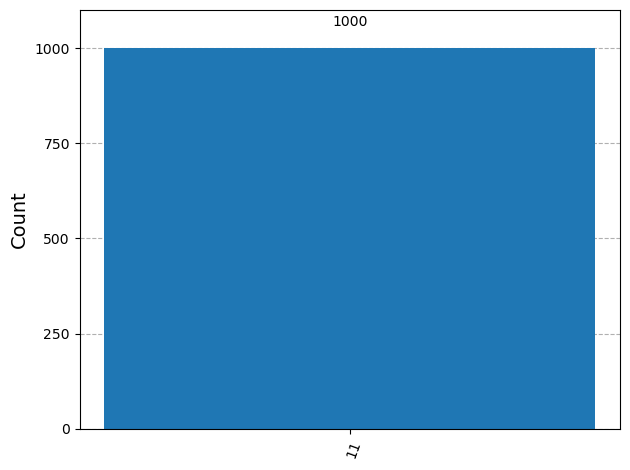

In [59]:
"""GRover Algorithmus"""
from qiskit.visualization import plot_histogram


from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

# Grover-Orakel für das Markieren von '11'
def grover_oracle(n):
    qc = QuantumCircuit(n)
    qc.cz(0, 1)  # CZ-Gatter markiert |11>
    return qc

# Diffusionsoperator (Inversion about the mean)
def diffusion_operator(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.cx(0, n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

n = 2
qc = QuantumCircuit(n, n)
qc.h(range(n))  # Superposition

# Oracle anwenden
qc.compose(grover_oracle(n), inplace=True)
# Diffusionsoperator anwenden
qc.compose(diffusion_operator(n), inplace=True)

qc.measure(range(n), range(n))

# Simulation
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
result = simulator.run(transpiled_circuit, shots=1000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)
